In [103]:
from sklearn.datasets import fetch_california_housing 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from geopy.geocoders import Nominatim
import numpy as np
import hvplot.pandas
from plotnine import *
import geopandas as gp

Data Set Characteristics:

Number of Instances:
 	
20640

Number of Attributes:
 	
8 numeric, predictive attributes and the target

Attribute Information:
 	
1. MedInc median income in block
2. HouseAge median house age in block
3. AveRooms average number of rooms
4. AveBedrms average number of bedrooms
5. Population block population
6. AveOccup average house occupancy
7. Latitude house block latitude
8. Longitude house block longitude

In [75]:
housing = fetch_california_housing(as_frame=True)

In [76]:
df = housing['data'].join(housing['target']) 
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [77]:
# Applying column transformations
#df['Latitude'] = df['Latitude'].map('{:,.2f}'.format)
#df['Longitude'] = df['Longitude'].map('{:,.2f}'.format)
#df["MedInc"] = df["MedInc"].map('{:,.2f}'.format)

#df = df.round({"AveRooms":2,"AveBedrms":2,"AveOccup":2})
#df["MedInc"] = df["MedInc"].map(lambda x:x*1000000).apply(np.int64)
#df["MedHouseVal"] = df["MedHouseVal"].map(lambda x:x*1000000).apply(np.int64)
df[["HouseAge","Population"]] = df[["HouseAge","Population"]] .apply(np.int64)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [78]:
df.describe(include="all")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [79]:
# checking for null
df.isnull().sum()


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [80]:
# checking for nan
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [81]:
# checking for duplicate rows
df.duplicated().sum()

0

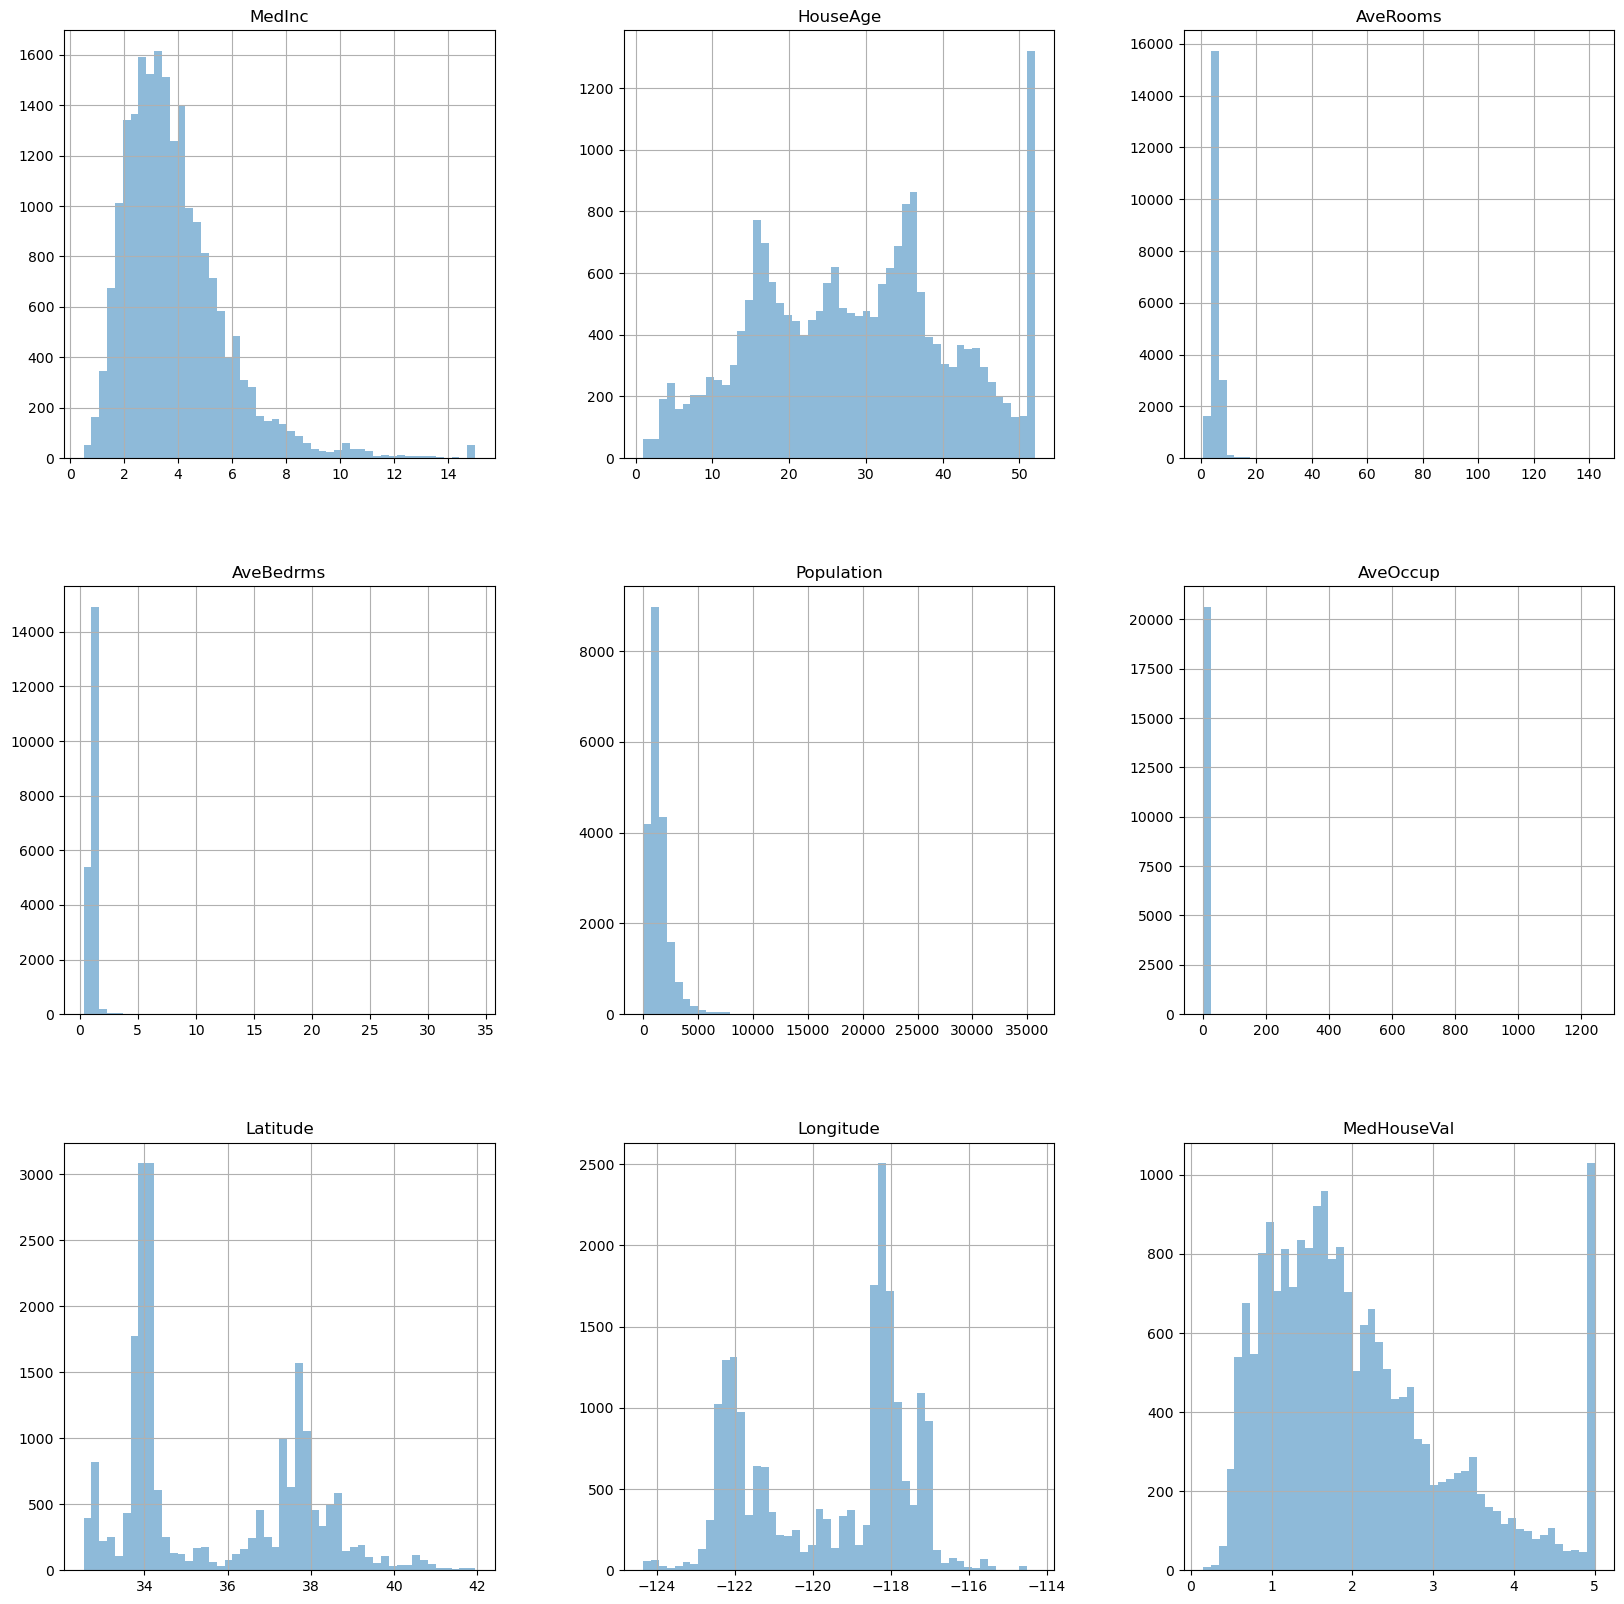

In [82]:
# histogram using matplotlib
df.hist(figsize=(20,20),alpha=0.5,bins=50)
plt.show()

In [90]:
#histogram using hvplot
(
df["HouseAge"].hvplot.hist(figsize=(20,20),alpha=0.5,width=200,bins=50,rot=90) 
+ df["AveRooms"].hvplot.hist(figsize=(20,20),alpha=0.5,width=200,bins=50,rot=90) 
+ df["AveBedrms"].hvplot.hist(figsize=(20,20),alpha=0.5,width=200,bins=50,rot=90) 
+ df["Population"].hvplot.hist(figsize=(20,20),alpha=0.5,width=200,bins=50,rot=90) 
+ df["AveOccup"].hvplot.hist(figsize=(20,20),alpha=0.5,width=200,bins=50,rot=90) 
+ df["MedHouseVal"].hvplot.hist(figsize=(20,20),alpha=0.5,width=200,bins=50,rot=90) 
+ df["MedInc"].hvplot.hist(figsize=(20,20),alpha=0.5,width=200,bins=50,rot=90) 
+ df["Latitude"].hvplot.hist(figsize=(20,20),alpha=0.5,width=200,bins=50,rot=90) 
+ df["Longitude"].hvplot.hist(figsize=(20,20),alpha=0.5,width=200,bins=50,rot=90) 

)

:Layout
   .Histogram.I    :Histogram   [HouseAge]   (HouseAge_count)
   .Histogram.II   :Histogram   [AveRooms]   (AveRooms_count)
   .Histogram.III  :Histogram   [AveBedrms]   (AveBedrms_count)
   .Histogram.IV   :Histogram   [Population]   (Population_count)
   .Histogram.V    :Histogram   [AveOccup]   (AveOccup_count)
   .Histogram.VI   :Histogram   [MedHouseVal]   (MedHouseVal_count)
   .Histogram.VII  :Histogram   [MedInc]   (MedInc_count)
   .Histogram.VIII :Histogram   [Latitude]   (Latitude_count)
   .Histogram.IX   :Histogram   [Longitude]   (Longitude_count)

In [110]:
# creating correlation matrix
cormat = df.corr()
round(cormat,2)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02,0.69
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11,0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03,0.15
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01,-0.05
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10,-0.02
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00,-0.02
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92,-0.14
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00,-0.05
MedHouseVal,0.69,0.11,0.15,-0.05,-0.02,-0.02,-0.14,-0.05,1.00


In [124]:
sns.set_theme()
ax = sns.heatmap(cormat,cmap="YlGnBu")

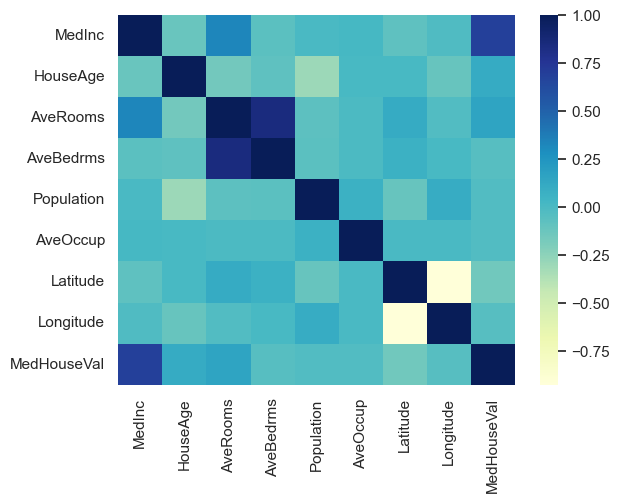

In [125]:
plt.show()

In [85]:
# get county and city names using geopy module
'''
def getCounty(row):
    Latitude = row['Latitude']
    Longitude = row['Longitude']
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.reverse(Latitude+","+Longitude)
    address = location.raw["address"]
    #city = address["city"]
    county = address["county"]
    return county
'''

'\ndef getCounty(row):\n    Latitude = row[\'Latitude\']\n    Longitude = row[\'Longitude\']\n    geolocator = Nominatim(user_agent="geoapiExercises")\n    location = geolocator.reverse(Latitude+","+Longitude)\n    address = location.raw["address"]\n    #city = address["city"]\n    county = address["county"]\n    return county\n'

In [86]:
#https://stackoverflow.com/questions/47969756/pandas-apply-function-that-returns-two-new-columns
'''
def run_loopy(df):
    City, County = [], []
    for _, row in df.iterrows():
        county = getCounty(row['Latitude'], row['Longitude'])
        #City.append(city)
        County.append(county)
    return pd.Series({#'City': City,
                      'County': County})

'''

"\ndef run_loopy(df):\n    City, County = [], []\n    for _, row in df.iterrows():\n        county = getCounty(row['Latitude'], row['Longitude'])\n        #City.append(city)\n        County.append(county)\n    return pd.Series({#'City': City,\n                      'County': County})\n\n"

In [87]:
'''
geolocator = Nominatim(user_agent="geoapiExercises")
location = geolocator.reverse("37.88"+","+"-122.23")
address = location.raw["address"]
city = address["city"]
county = address["county"]
print(city)
print(county)
#location.raw["address"]["county"]
#location.raw["address"]["city"]
'''

'\ngeolocator = Nominatim(user_agent="geoapiExercises")\nlocation = geolocator.reverse("37.88"+","+"-122.23")\naddress = location.raw["address"]\ncity = address["city"]\ncounty = address["county"]\nprint(city)\nprint(county)\n#location.raw["address"]["county"]\n#location.raw["address"]["city"]\n'

In [88]:
'''
Latitude = "37.88"
Longitude = "-122.23"
city,county = getCounty(Latitude,Longitude)
print(city,county)
'''

'\nLatitude = "37.88"\nLongitude = "-122.23"\ncity,county = getCounty(Latitude,Longitude)\nprint(city,county)\n'

In [89]:
#df['County'] = run_loopy(df)
#df['County'] = df.apply(getCounty, axis=1)
